# Create random signals

This notebook can be used to create a configured number of random signals within the given area.

In [1]:
!pip install geopandas

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

from pathlib import Path
import matplotlib.pyplot as plt
import geopandas
import numpy as np
from shapely.geometry import Point

## Configure and download data

Set the variables `path` and `file_name` depending on the name and location of the .geojson file that contains your area of interest. 
To create the grid layer and the .geojon file you can have a look in the MARS documentation (https://mars.haw-hamburg.de/articles/core/tutorials/create_vector_layer_raster_layer.html)

The `number_signals` defines how many signals are generated


In [2]:
# If you see the following error, it can be ignored:
# `ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed`
path = "./DroneSimulation/Resources"
file_name = '/area.geojson'

res_location: str = path+file_name
area = geopandas.read_file(res_location)

number_signals = 10

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


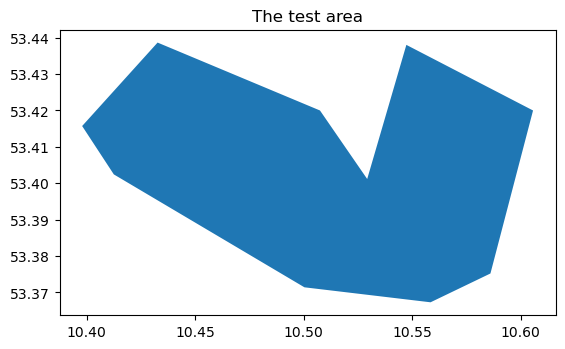

In [3]:
area.plot()
plt.title("The test area")
plt.show()

In [4]:
points = []
bounds = area.bounds.values[0]
minx = bounds[0]
miny = bounds[1]
maxx = bounds[2]
maxy = bounds[3]
while len(points) < number_signals:
    pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
    if area.contains(pnt)[0]:
        points.append(pnt)

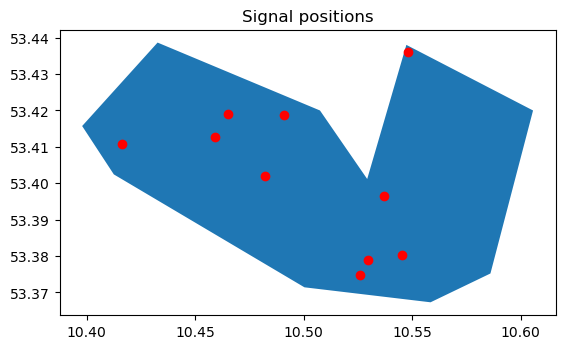

In [5]:
# Plot the polygon
area.plot()

# Plot the list of points
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.title("Signal positions")
plt.scatter(xs, ys,color="red")
plt.show()

In [6]:
signals_dict= {'signal':[],'located':[], 'geometry': []}
name_count = 1

for i in points:
    signals_dict['signal'].append("Signal_" + str(name_count))
    signals_dict['located'].append("false")
    signals_dict['geometry'].append(i)
    name_count += 1
    

In [7]:
signal_geopandas = geopandas.GeoDataFrame(signals_dict, crs="EPSG:4326")

signal_geopandas.head()

,signal,located,geometry
0,Signal_1,false,POINT (10.45906 53.41271)
1,Signal_2,false,POINT (10.54787 53.43593)
2,Signal_3,false,POINT (10.52576 53.37469)
3,Signal_4,false,POINT (10.41626 53.41081)
4,Signal_5,false,POINT (10.52954 53.37877)


In [15]:
# Save to .geojson file that can be used in MARS
res_path = Path(path)
res_path.mkdir(parents=True, exist_ok=True)

signal_geopandas.to_file(res_path / "test_signals.geojson", driver="GeoJSON")